In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
y=np.arange(1,10,0.5)
y2= y**2

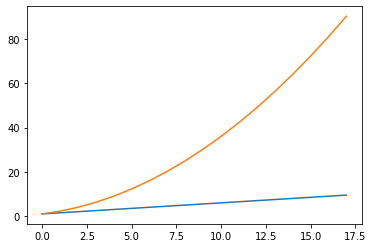

In [6]:
plt.plot(y)
plt.plot(y2)

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Position_Salaries.csv')

In [8]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<AxesSubplot:xlabel='Level', ylabel='Salary'>

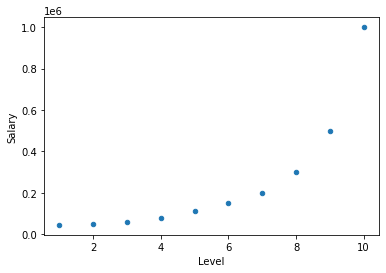

In [11]:
df.plot(x='Level',y='Salary',kind="scatter")

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [13]:
x=df[['Level']]
y=df[['Salary']]

In [14]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [17]:
model.score(x,y)*100

66.90412331929895

In [18]:
df['Pred']=model.predict(x)

In [19]:
df

,Position,Level,Salary,Pred
0,Business Analyst,1,45000,-114454.545455
1,Junior Consultant,2,50000,-33575.757576
2,Senior Consultant,3,60000,47303.030303
3,Manager,4,80000,128181.818182
4,Country Manager,5,110000,209060.606061
5,Region Manager,6,150000,289939.393939
6,Partner,7,200000,370818.181818
7,Senior Partner,8,300000,451696.969697
8,C-level,9,500000,532575.757576
9,CEO,10,1000000,613454.545455


<AxesSubplot:xlabel='Level', ylabel='Salary'>

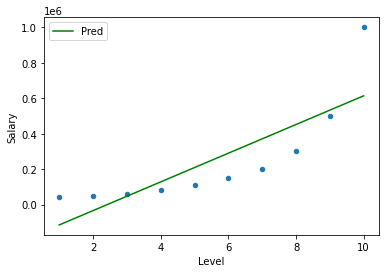

In [26]:
ax=df.plot(x='Level',y='Salary',kind='scatter')
df.plot(x='Level',y='Pred',ax=ax,color='green')


In [72]:
from sklearn.metrics import mean_absolute_error
def check_polynomial_regression(x,y,degree):
    pf=PolynomialFeatures(degree)
    px=pf.fit_transform(x)
    model1=LinearRegression()
    model1.fit(px,y)
    df[f'Pred{degree}']=model1.predict(px)
    ax=df.plot(x='Level',y='Salary',kind='scatter')
    df.plot(x='Level',y=f'Pred{degree}',ax=ax,color='green')
    mae=mean_absolute_error(y,df[f'Pred{degree}'])
    print('degree',degree,'score',model1.score(pf.transform(x),y)*100,',mae=>',mae)
    plt.show()



degree 1 score 66.90412331929895 ,mae=> 128454.54545454546


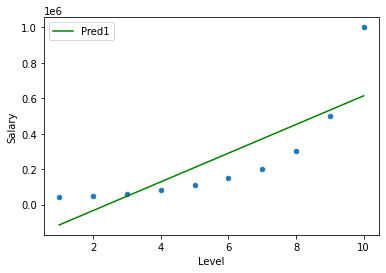

degree 2 score 91.62082221443943 ,mae=> 70218.1818181819


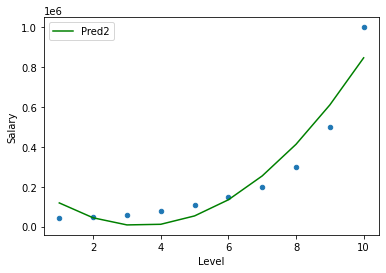

degree 3 score 98.12097727913368 ,mae=> 34790.20979020895


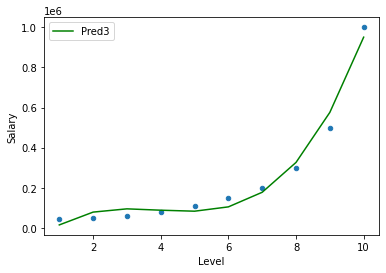

degree 4 score 99.73922891706614 ,mae=> 12681.818181828949


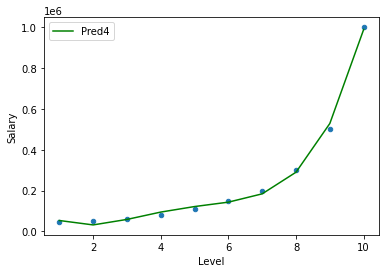

degree 5 score 99.97969027099754 ,mae=> 3360.839160905867


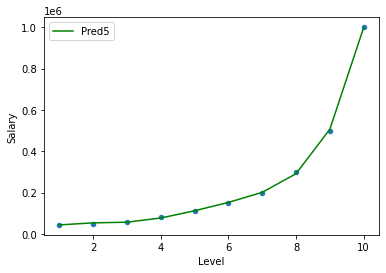

degree 6 score 99.99494749253776 ,mae=> 1476.456876822887


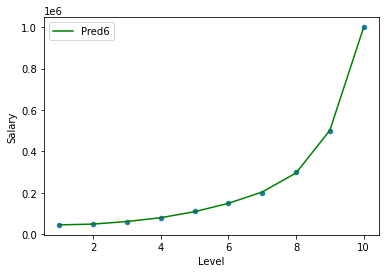

degree 7 score 99.9977014372917 ,mae=> 1025.3805187965568


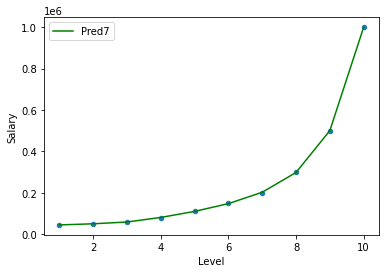

degree 8 score 99.99934972438326 ,mae=> 531.7981693140464


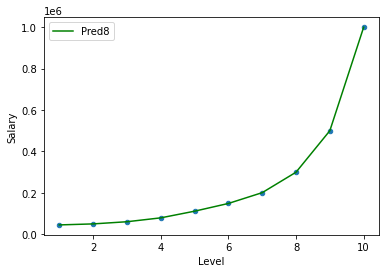

degree 9 score 99.99999999999848 ,mae=> 0.02530721346847713


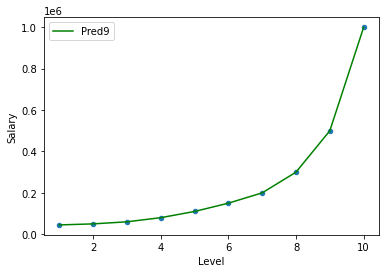

degree 10 score 100.0 ,mae=> 0.0006908513139933347


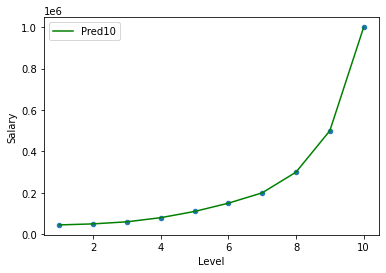

In [73]:
for i in range(1,11):
    check_polynomial_regression(x,y,i)

In [74]:
p=PolynomialFeatures(degree=8)
m=LinearRegression()
px=p.fit_transform(x)
m.fit(px,y)

LinearRegression()

In [76]:
m.score(px,y)*100

99.99934972438326

In [77]:
m.predict(p.transform([[8]]))

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[299626.07985711]])

In [78]:
df

,Position,Level,Salary,Pred,Pred2,Pred3,Pred4,Pred5,Pred6,Pred7,Pred8,Pred9,Pred10,Pred1
0,Business Analyst,1,45000,118727.272727,118727.272727,14902.097902,53356.643357,43895.104896,45190.559442,44942.204701,45010.387114,4.499996e+04,44999.999989,-114454.545455
1,Junior Consultant,2,50000,44151.515152,44151.515152,78759.906760,31759.906760,53836.829837,49086.829839,50383.792686,49906.523168,5.000001e+04,50000.000294,-33575.757576
2,Senior Consultant,3,60000,8439.393939,8439.393939,94960.372960,58642.191142,57065.268066,61383.449885,59010.283828,60373.922024,6.000002e+04,60000.000206,47303.030303
3,Manager,4,80000,11590.909091,11590.909091,88223.776224,94632.867133,77286.713287,79877.622378,81036.610495,79127.522737,8.000000e+04,80000.000227,128181.818182
4,Country Manager,5,110000,53606.060606,53606.060606,83270.396270,121724.941725,112263.403264,108808.857810,110354.175270,111308.721912,1.100000e+05,110000.000226,209060.606061
5,Region Manager,6,150000,134484.848485,134484.848485,104820.512821,143275.058275,152736.596737,149282.051284,147736.733825,148691.280067,1.500000e+05,150000.000340,289939.393939
6,Partner,7,200000,254227.272727,254227.272727,177594.405594,184003.496504,201349.650350,203940.559442,202781.571350,200872.482748,2.000000e+05,200000.000613,370818.181818
7,Senior Partner,8,300000,412833.333333,412833.333333,326312.354312,289994.172494,291571.095571,295889.277390,298262.443494,299626.079857,3.000000e+05,300000.001143,451696.969697
8,C-level,9,500000,610303.030303,610303.030303,575694.638695,528694.638695,506617.715617,501867.715615,500570.752793,500093.477050,4.999999e+05,500000.000401,532575.757576
9,CEO,10,1000000,846636.363636,846636.363636,950461.538462,988916.083916,998377.622376,999673.076915,999921.431558,999989.603324,1.000000e+06,999999.996552,613454.545455


In [ ]:
#example